In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets
import numpy as np
import scipy as sp
from numpy import linalg
from scipy import sparse
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn import manifold
from sklearn import datasets
from mpl_toolkits import mplot3d

In [10]:
def simul_normal(n):
    U = np.random.random((n+1)//2)
    V = np.random.random((n+1)//2)
    X, Y = (np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V),
            np.sqrt(-2*np.log(U))*np.sin(2*np.pi*V))
    return np.concatenate([X, Y])[:n]

def simul_unif_sphere(n,d):
    X = simul_normal(n*d)
    X = X.reshape((n,d))
    return X / np.linalg.norm(X, axis=1).reshape((n,1))


In [11]:
def eigenmaps_default(data,t):
    N=1500
    if data=="Scurve":
        X, color = sklearn.datasets.make_s_curve(N)
    elif data== "Sphere":
        X = simul_unif_sphere(N,3)
        color =X[:,0]
    elif data=="2Sphere":
        M1 = int(4*N/5)
        M2 = int(N/5)
        M = M1 + M2
        X1 = simul_unif_sphere(M1,3)
        X2 = simul_unif_sphere(M2,3)/4 + 1
        X = np.concatenate((X1,X2), axis=0)
        color =X[:,0]
    else:
        X = simul_unif_sphere(M,3)
        X[:,0] *= 2
        X[:,1] *= 7
        color =X[:,0]

    G = sklearn.neighbors.radius_neighbors_graph(X, 1, mode='distance', n_jobs=-1).todense()
    W = np.exp(-G[:,:]**2/4/t)
    W[np.where(G==0)] = 0
    W += np.eye(N)
    D = np.sum(W, axis=1)
    S = np.eye(N)-W/D
    val, Y = np.linalg.eig(S) 
    
    fig = plt.figure(figsize=(13,8.5))

    ax = fig.add_subplot(3,3,1,projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2],c=color, marker='.',cmap='jet')
    ax = fig.add_subplot(3,3,2)
    ax.scatter(np.array(np.real(Y[:,1]))[:,0], np.array(np.real(Y[:,0]))[:,0],
           c=color, marker='.', cmap='jet')
    ax.title.set_text("mods: "+str(1)+" "+str(0))
    ax.axis('off')
    for i in range(3,10) :
        ax = fig.add_subplot(3,3,i)
        ax.scatter(np.array(np.real(Y[:,1]))[:,0], np.array(np.real(Y[:,i-1]))[:,0],
               c=color, marker='.', cmap='jet')
        ax.title.set_text("mods: "+str(1)+" "+str(i-1))
        ax.axis('off')
    plt.show()

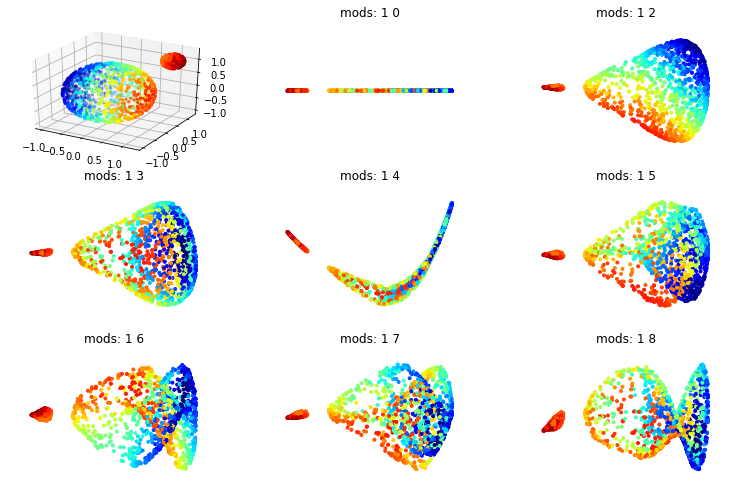

In [24]:
eigenmaps_default("2Sphere",100)